In [29]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/.DS_Store
./data/preprocessed_dataset.csv
./data/new_preprocessed_dataset.csv
./data/BankChurners.csv
./data/Bartek/new_preprocessed_dataset.csv
./data/Bartek/X_train.csv
./data/Bartek/y_train.csv
./data/Bartek/y_test.csv
./data/Bartek/X_test.csv
./data/Adam/X_train.csv
./data/Adam/y_train.csv
./data/Adam/X.csv
./data/Adam/y.csv
./data/Adam/y_test.csv
./data/Adam/X_test.csv


In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
plt.style.use('ggplot')

from scipy import stats
from scipy.stats import norm


from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

import math
import warnings
warnings.filterwarnings('ignore')

In [31]:
full_df = pd.read_csv('./data/BankChurners.csv')

display(full_df.shape)

full_df.sample(5)

(10127, 23)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
3987,765692658,Existing Customer,49,F,4,Graduate,Single,Less than $40K,Blue,42,...,2162.0,1882,280.0,0.934,3825,70,0.750,0.870,0.000541,0.999460
8565,779442783,Existing Customer,39,F,1,Graduate,Single,Less than $40K,Blue,21,...,2867.0,1365,1502.0,0.502,4445,89,0.745,0.476,0.000064,0.999940
6049,716924958,Attrited Customer,65,F,2,Graduate,Single,Less than $40K,Blue,56,...,6812.0,1926,4886.0,0.735,2288,48,0.778,0.283,0.971660,0.028340
3289,716306583,Attrited Customer,64,M,0,Graduate,Single,Less than $40K,Blue,36,...,3812.0,2517,1295.0,0.586,2325,45,0.731,0.660,0.998700,0.001303
4368,715762083,Existing Customer,46,M,0,Uneducated,Single,$60K - $80K,Silver,36,...,30501.0,2030,28471.0,0.560,2525,45,0.500,0.067,0.000143,0.999860


In [32]:
# We don't need the unique ids'
full_df.drop('CLIENTNUM', axis=1, inplace=True)

full_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], 
          inplace=True, axis=1)
full_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
          inplace=True, axis=1)

display(full_df.shape)

(10127, 20)

### Binary Flags

In [33]:
updated_df = pd.DataFrame()

def tobinary():
    
    # full_df['Attrition_Flag'] = full_df.Attrition_Flag // same thing
    updated_df['Attrition'] = full_df.Attrition_Flag.map({'Existing Customer':0, 'Attrited Customer':1})
    
    updated_df['Gender'] = full_df.Gender.map({'M':1, 'F':0})

### String to integer

In [34]:
numeric_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt','Dependent_count',
                  'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal',
                  'Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']

def stringtoint():
    missing_income = full_df['Income_Category'].replace({'Unknown': 1 , 'Less than $40K':0, '$40K - $60K':0, 
                                                      '$80K - $120K':0, '$60K - $80K':0, '$120K +':0})
    #missinng data will be replaced with mode:
    income_data    = full_df['Income_Category'].replace({'Unknown': 1 , 'Less than $40K':1, '$40K - $60K':2, 
                                                      '$80K - $120K':4, '$60K - $80K':3, '$120K +':5})
    
    
    
    missing_education = full_df['Education_Level'].replace({'Unknown': 1, 'High School':0, 'Graduate':0, 'Uneducated':0,
                                                         'College':0,'Post-Graduate':0,'Doctorate':0})
    #missinng data will be replaced with mode:
    education_data    = full_df['Education_Level'].replace({'Unknown': 4, 'High School':2, 'Graduate':4, 'Uneducated':1,
                                                         'College':3,'Post-Graduate':5,'Doctorate':6})
    
    # Card_Category has no missing data
    card_data = full_df['Card_Category'].replace({'Blue':1, 'Gold':2, 'Platinum':3, 'Silver':4})
    
    
    updated_df['Missing_Income']    = missing_income
    updated_df['Income_Category']   = income_data
    updated_df['Missing_Education'] = missing_education
    updated_df['Education_Level']   = education_data
    updated_df['Card_Category']     = card_data

### Dummies

In [35]:
def encode():
    global updated_df
    marital_dummies = pd.get_dummies(full_df['Marital_Status'], prefix='Marital')
    updated_df = pd.concat([updated_df, marital_dummies], axis=1)

In [36]:
def concat_with_numerics():
    global updated_df
    updated_df = pd.concat([updated_df, full_df.loc[:, numeric_columns]], axis=1)

In [37]:
tobinary()
stringtoint()
encode()
concat_with_numerics()

In [38]:
print('Data shapes """including target value"""')
print(f'Old shape : {full_df.shape}')
print(f'Updated shape : {updated_df.shape}')

Data shapes """including target value"""
Old shape : (10127, 20)
Updated shape : (10127, 25)


In [44]:
updated_df.to_csv("data/new_preprocessed_dataset.csv", index=False)

In [42]:
updated_df.columns

Index(['Attrition', 'Gender', 'Missing_Income', 'Income_Category',
       'Missing_Education', 'Education_Level', 'Card_Category',
       'Marital_Divorced', 'Marital_Married', 'Marital_Single',
       'Marital_Unknown', 'Customer_Age', 'Credit_Limit', 'Months_on_book',
       'Avg_Utilization_Ratio', 'Avg_Open_To_Buy', 'Total_Trans_Amt',
       'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'],
      dtype='object')

In [45]:
updated_df.Attrition.to_numpy()

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition, Length: 10127, dtype: int64

# Modelling

In [41]:
!pip install lightgbm

In [42]:
# Importing packages for modelling.

import xgboost as xgb
import lightgbm as lgb

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [43]:
def estimates(X_data, y_data, models, cv):
    
    train_acc_dict = dict()
    test_acc_dict = dict()
    time_dict = dict()
    
    for model in models:
        
        current_model_name = model.__class__.__name__
        
        cv_results = cross_validate(model, X_data, y_data, cv=cv,
                                    return_train_score=True, scoring='accuracy')
        
        train_acc_dict[current_model_name] = cv_results['train_score'].mean()
        test_acc_dict[current_model_name] = cv_results['test_score'].mean()
        time_dict[current_model_name] = cv_results['fit_time'].mean()
        
    return train_acc_dict, test_acc_dict, time_dict

In [44]:
m_logreg = LogisticRegression()

m_gbc = GradientBoostingClassifier(random_state=14)

m_rfc = RandomForestClassifier(criterion='gini', n_estimators=999,
                            max_depth=4, random_state=14)

m_lgb = lgb.LGBMClassifier(num_iterations=550, learning_rate=0.01055,
                        max_depth=3, random_state=14)

m_xgb = xgb.XGBClassifier(n_estimators=2250,
                       max_depth=2, random_state=14)

m_gnb = GaussianNB()

m_mlpc = MLPClassifier(random_state=14)

m_svc = SVC(probability=True)

In [45]:
cv = StratifiedKFold(11, shuffle=True, random_state=14)

models = [m_logreg, m_gbc, m_rfc, m_lgb, m_xgb, m_gnb, m_mlpc, m_svc]

X = updated_df.drop('Attrition', axis=1)
y = updated_df['Attrition']

print(X.shape)
print(y.shape)

train_acc_dict, test_acc_dict, time_dict = estimates(X, y, models, cv)

(10127, 57)
(10127,)


# Model results

In [46]:
# Training accuracy
for key, value in train_acc_dict.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 87.8%
GradientBoostingClassifier - 97.5%
RandomForestClassifier - 91.4%
LGBMClassifier - nan%
XGBClassifier - nan%
GaussianNB - 85.0%
MLPClassifier - 80.8%
SVC - 83.9%


In [47]:
# Test accuracy
for key, value in test_acc_dict.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 87.7%
GradientBoostingClassifier - 96.6%
RandomForestClassifier - 91.0%
LGBMClassifier - nan%
XGBClassifier - nan%
GaussianNB - 84.9%
MLPClassifier - 80.6%
SVC - 83.9%


In [48]:
def result_barplots(result_1, result_2, ylabel_1 = 'Score', ylabel_2 = 'Score'):
    
    current_df_1 = pd.DataFrame({'Model':list(result_1.keys()),ylabel_1:list(result_1.values())})
    current_df_2 = pd.DataFrame({'Model':list(result_1.keys()),ylabel_2:list(result_1.values())})
    
    current_df_1 = current_df_1.sort_values(by=ylabel_1, ascending=False)
    current_df_2 = current_df_2.sort_values(by=ylabel_2, ascending=False)
    
    fig, ax = plt.subplots(1,2,figsize=(18,9), constrained_layout=True)
    
    for i in range(2):
        for item in ax[i].get_xticklabels():
            item.set_rotation(45)
    
    sns.barplot('Model',ylabel_1,data=current_df_1,ax=ax[0])
    sns.barplot('Model',ylabel_2,data=current_df_2,ax=ax[1])

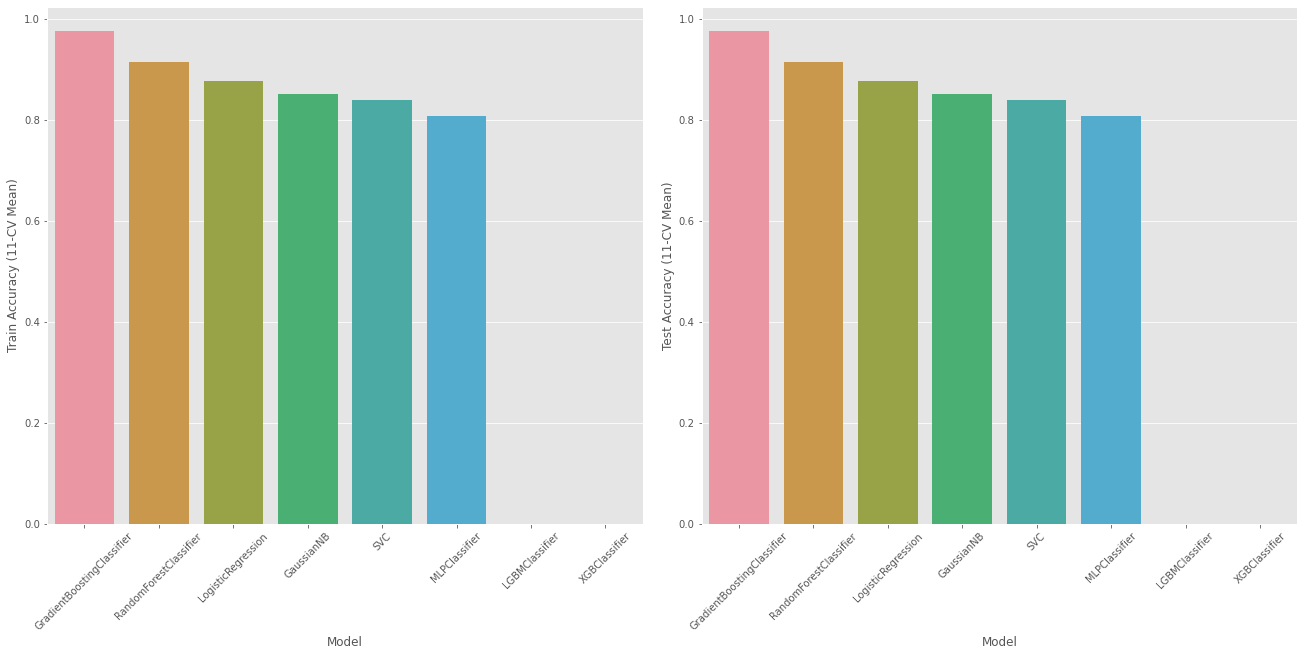

In [49]:
result_barplots(train_acc_dict, test_acc_dict, 'Train Accuracy (11-CV Mean)', 'Test Accuracy (11-CV Mean)')

In [50]:
def result_line(result, title = 'Fitting Time in seconds'):
    
    current_df = pd.DataFrame({'Model':list(result.keys()),'Score':list(result.values())})
    
    plt.figure(figsize=(15,10))
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel('Time in seconds')
    plt.plot(current_df['Model'], current_df['Score'], 'o-',
             color='r')
    plt.xticks(rotation=45)
    plt.show()

In [51]:
# Fitting time
for key, value in time_dict.items():
    print('{} - {:.1f} seconds'.format(key, value))

LogisticRegression - 0.2 seconds
GradientBoostingClassifier - 4.9 seconds
RandomForestClassifier - 7.7 seconds
LGBMClassifier - 0.1 seconds
XGBClassifier - 0.0 seconds
GaussianNB - 0.0 seconds
MLPClassifier - 2.0 seconds
SVC - 25.5 seconds


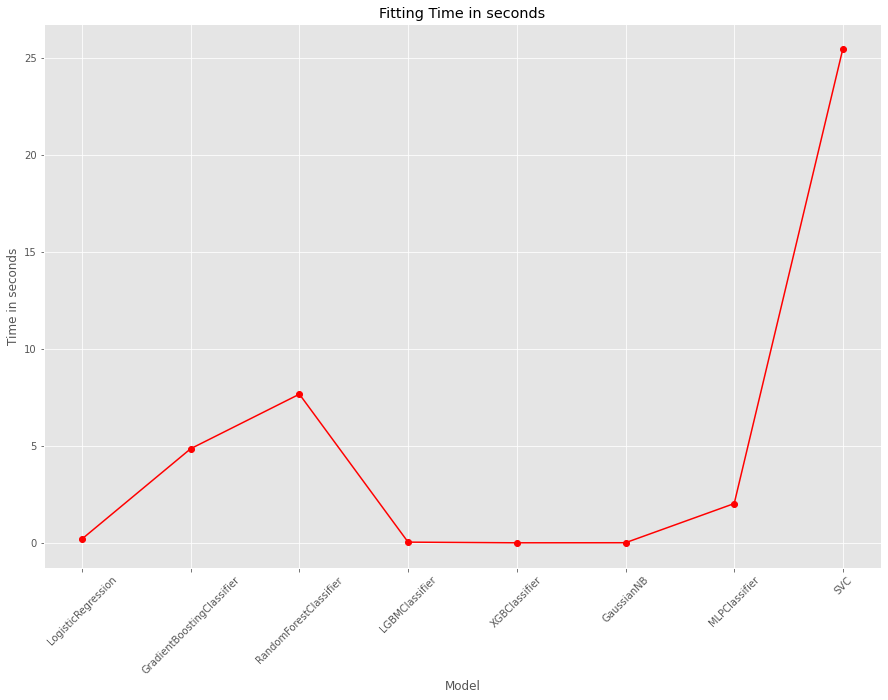

In [52]:
result_line(time_dict)

# Feature Importance

In [53]:
def plot_importance_features(models, X, y):
    
    fig, axes = plt.subplots(2, len(models) // 2, figsize=(23, 12))

    for ax, model in zip(axes.flatten(), models):
        try:
            model.fit(X, y)
            importance_features = pd.DataFrame(sorted(
                zip(model.feature_importances_, X.columns)),
                                       columns=['Value', 'Feature'])

            importance_features = importance_features.sort_values('Value', ascending=False)
            sns.barplot(y="Feature", x="Value", ax=ax,
                        data=importance_features)
            current_model_name = model.__class__.__name__
            ax.set(title=f'{current_model_name} Feature Importances')
            ax.xaxis.set_major_locator(MaxNLocator(nbins=11))
        except:
            pass

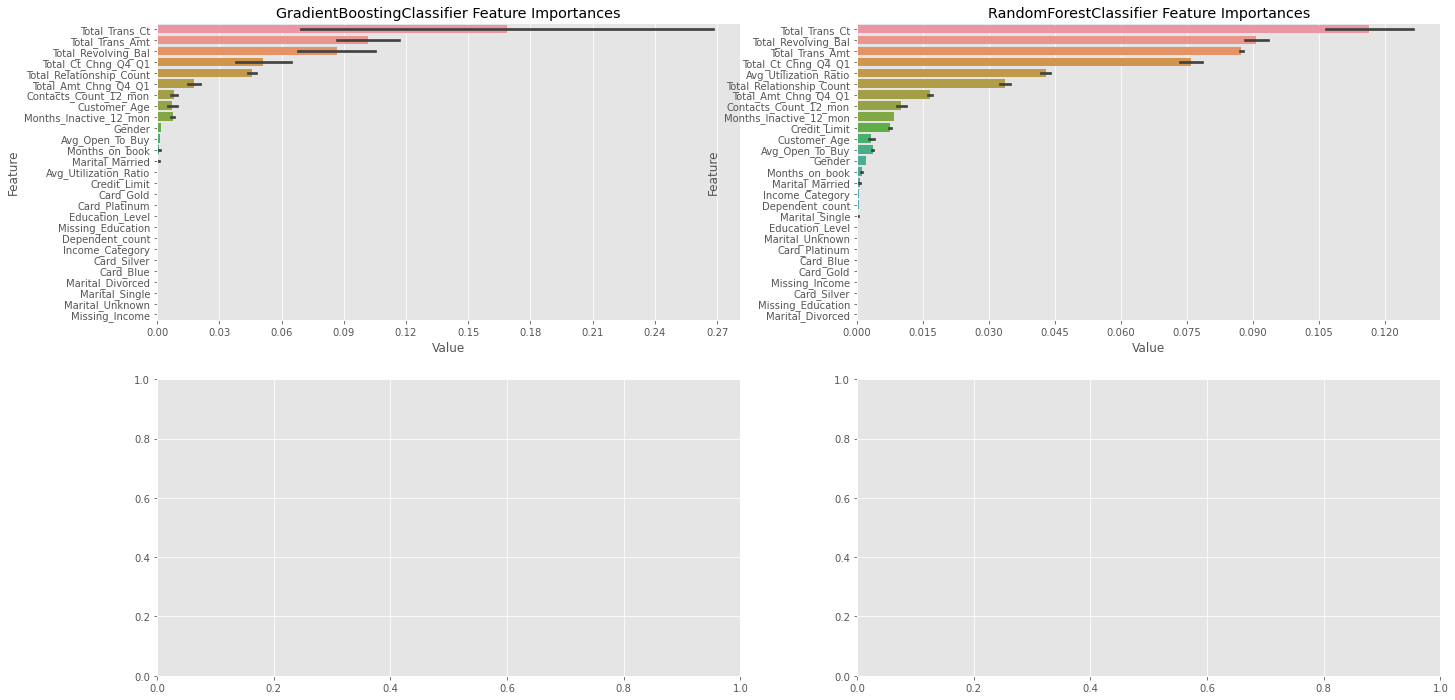

In [54]:
# some estimators don't have feature_importance that's why i choosed the estimators which are include feature_importance
plot_importance_features(models[1:5], X, y)

### Dimensional Reduction & Fit models again

Maybe some features are decreasing our models' accuracy. We try to reduce dimension then check accuracy again. Also, we try to improve models' accuracy using StandartScaler

In [55]:
# creates pipeline
my_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=2)),
])

X_red = my_pipe.fit_transform(X)

**Fit again**

In [56]:
train_acc_dict_red, test_acc_dict_red, time_dict_red = estimates(X_red, y, models, cv)

[18:39:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:40:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

### Print & Plot the models' accuracy again.

In [57]:
# Training accuracy
for key, value in train_acc_dict_red.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 83.9%
GradientBoostingClassifier - 84.3%
RandomForestClassifier - 83.9%
LGBMClassifier - 84.0%
XGBClassifier - 90.3%
GaussianNB - 83.9%
MLPClassifier - 83.9%
SVC - 83.9%


In [58]:
# Test accuracy
for key, value in test_acc_dict_red.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 83.9%
GradientBoostingClassifier - 83.8%
RandomForestClassifier - 83.9%
LGBMClassifier - 83.9%
XGBClassifier - 81.9%
GaussianNB - 83.9%
MLPClassifier - 83.9%
SVC - 83.9%


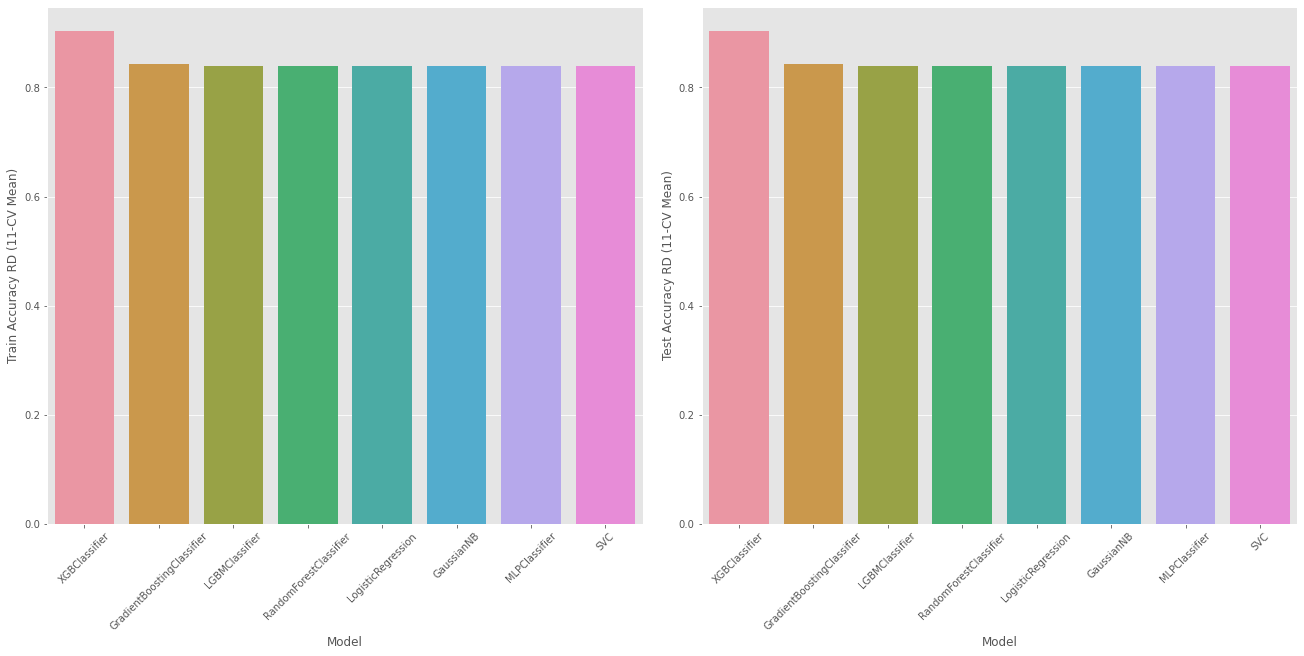

In [59]:
# plot bar plot
result_barplots(train_acc_dict_red, test_acc_dict_red, 'Train Accuracy RD (11-CV Mean)', 'Test Accuracy RD (11-CV Mean)')

In [60]:
# Fitting time
for key, value in time_dict.items():
    print('{} - {:.1f} seconds'.format(key, value))

LogisticRegression - 0.2 seconds
GradientBoostingClassifier - 4.9 seconds
RandomForestClassifier - 7.7 seconds
LGBMClassifier - 0.1 seconds
XGBClassifier - 0.0 seconds
GaussianNB - 0.0 seconds
MLPClassifier - 2.0 seconds
SVC - 25.5 seconds


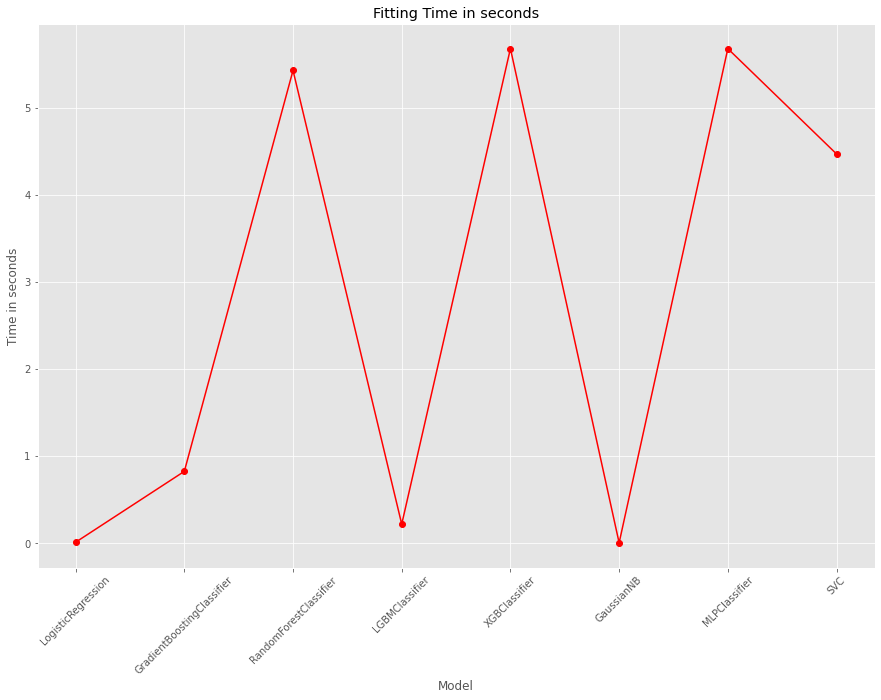

In [61]:
# plot line
result_line(time_dict_red)